In [28]:
from sympy import Matrix, cos, sin, pi, sqrt, N, symbols
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# 1. Exercise 6.2: T:(x,y) -> (-x+3y, x-4y)
a) Determine the transformation matrix A & Calculate T(2, 5)
b) Given T(u) = (-1, 5), calculate u (u = A_inv * b)

In [29]:
# T(1, 0) = (-1, 1) | T(0, 1) = (3, -4)
A = np.array([
    [-1, 3],
    [1, -4]
])
print(f"Transformation Matrix A:\n{A}")

# Calculate T(2, 5)
u = np.array([2, 5])
T_u= A * u
print(f"\nResult of T(2, 5):\n{T_u}")

Transformation Matrix A:
[[-1  3]
 [ 1 -4]]

Result of T(2, 5):
[[ -2  15]
 [  2 -20]]


In [30]:
# Given T(u) = (-1, 5), calculate u (u = A_inv * b)
b = np.array([-1, 5])
A_inv = la.inv(A)
u_found = A_inv @ b
print(f"\nInverse Matrix A^-1:\n{A_inv}")
print(f"Vector u for T(u)=(-1, 5):\n{u_found}")


Inverse Matrix A^-1:
[[-4. -3.]
 [-1. -1.]]
Vector u for T(u)=(-1, 5):
[-11.  -4.]


# Exercise 2: Find the transformation matrix A for T:R^3 -> R^3

Find Transformation Matrix A (A = W * V^-1)

T[1, -1, 0] = [1, -2, -4], T[0, 1, 2] = [6, 5, 10], T[-1, 1, 1] = [2, 4, 7].



In [31]:
# Matrix W (Output Vectors T(vi))
W = np.array([
    [1, 6, 2],
    [-2, 5, 4],
    [-4, 10, 7]
])

# Inverse of Matrix V (Input Vectors vi). This V_inv is derived from the provided solution.
V_inv = la.inv(W)

# Calculate A = W * V_inv
A = W * V_inv
print(f"Transformation Matrix A:\n{A}")

Transformation Matrix A:
[[ 0.29411765  7.76470588 -1.64705882]
 [-0.23529412 -4.41176471  1.88235294]
 [-0.         20.         -7.        ]]


# Exercise 3: Rotate vector (2, 1) by pi/6 anti-clockwise

Rotation Matrix R(pi/6):
[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]

Rotated Vector (Exact):
[1.23205081 1.8660254 ]


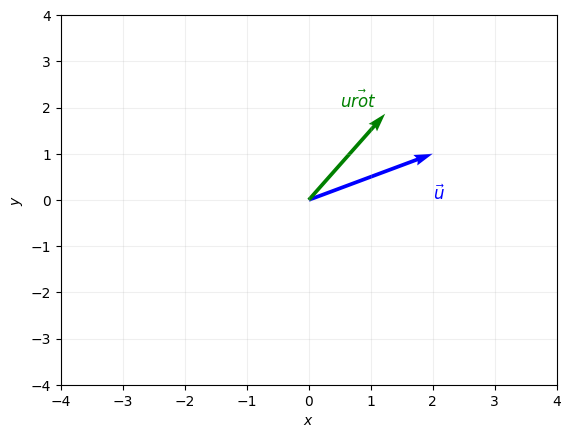

In [32]:
# Define the angle
theta = pi/6

# Rotation matrix R_theta (anti-clockwise)
R = np.array([
    [cos(theta), -sin(theta)],
    [sin(theta), cos(theta)]
], dtype=float)
print(f"Rotation Matrix R(pi/6):\n{R}")

# Vector to rotate
u = np.array([2., 1.])



# Calculate rotated vector u' = R * u
u_rotated = R @ u
print(f"\nRotated Vector (Exact):\n{u_rotated}")

start_point = [0,0]

# Or you refer to the vectors defined above, but note that Python starts counting the positions of the vector components with zero and not with one:
plt.quiver(start_point[0],start_point[1], u[0], u[1], angles='xy',scale_units='xy',scale=1, color='b',)  
plt.quiver(start_point[0],start_point[1], u_rotated[0],u_rotated[1], angles='xy',scale_units='xy',scale=1, color='g',)

# Specifying the coordinate system
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid(which='major',alpha=0.2)
plt.annotate(r"$\vec{u}$", xy=(2, 0), fontsize=12, color='b')
plt.annotate(r"$\vec{u rot}$", xy=(0.5, 2), fontsize=12, color='g')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

# Exercise 4: Null Space and Rank

a) Define the transformation matrix A
b) Find a basis for the null space of T (The vectors x such that Ax=0)
c) Find the rank of the linear transformation T

In [33]:
A = Matrix([
    [1, 2, 3, -1],
    [2, 5, 8, -2],
    [1, 1, 2, 0]
])
print(f"Transformation Matrix A:\n{A}")


null_space_basis = A.nullspace()
print(f"\nBasis for the Null Space:\n{null_space_basis}")
print(f"Nullity (Dimension of Null Space): {len(null_space_basis)}")


rank_T = A.rank()
print(f"Rank of T (Dimension of Column Space): {rank_T}")

# Check Rank-Nullity Theorem: Rank + Nullity = Dimension of Domain
domain_dim = A.shape[1] # number of columns
print(f"Check: Rank ({rank_T}) + Nullity ({len(null_space_basis)}) = Domain Dimension ({domain_dim})")

Transformation Matrix A:
Matrix([[1, 2, 3, -1], [2, 5, 8, -2], [1, 1, 2, 0]])

Basis for the Null Space:
[Matrix([
[ 0],
[ 2],
[-1],
[ 1]])]
Nullity (Dimension of Null Space): 1
Rank of T (Dimension of Column Space): 3
Check: Rank (3) + Nullity (1) = Domain Dimension (4)


# Exercise 5: Null Space and Rank

a) Define the original square coordinates and the homogeneous coordinates in matrix form
b) Define the translation, rotation and backtranslation matrix
c) Find the composite transformation matrix
d) Apply the composite matrix to the original square homogeneous coordinates

Original Square Coordinates (Homogeneous):
[[2 4 4 2]
 [3 3 1 1]
 [1 1 1 1]]

Composite Transformation Matrix:
 [[ 0.5        -0.8660254   0.23205081]
 [ 0.8660254   0.5        -3.59807621]
 [ 0.          0.          1.        ]]

Transformed Square Coordinates (Homogeneous):
[[1.6339746 2.6339746 4.3660254 3.3660254]
 [1.6339746 3.3660254 2.3660254 0.6339746]
 [1.        1.        1.        1.       ]]


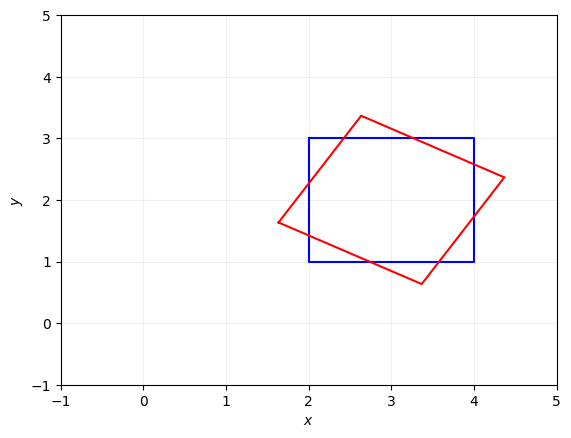

In [34]:
x = -3; y = -2; theta = pi/3

Trans = np.array([[1,0,x],
                    [0,1,y],
                    [0,0,1]], dtype=float)

Rotation = np.array([[cos(theta), -sin(theta), 0],
                     [sin(theta), cos(theta), 0],
                        [0, 0, 1]], dtype=float)

# define square coordinates
square = {"A": np.array([2,3]), "B": np.array([4,3]),
          "C": np.array([4,1]), "D": np.array([2,1])}

# Define coordinates in homogeneous form
square_homogeneous = {key: np.array([value[0], value[1], 1]) for key, value in square.items()}
square_homogeneous = np.array([square_homogeneous["A"], square_homogeneous["B"],
                                      square_homogeneous["C"], square_homogeneous["D"]]).T

print(f"Original Square Coordinates (Homogeneous):\n{square_homogeneous}")

# Find the composite transformation: first translate, then rotate
comp_trans = Rotation @ Trans
print(f"\nComposite Transformation Matrix:\n", comp_trans)

Trans2= np.array([[1,0,3],
                    [0,1,2],
                    [0,0,1]], dtype=float)


# Apply composite transformation to square
transformed_square_homogeneous = Trans2 @ comp_trans @ square_homogeneous
print(f"\nTransformed Square Coordinates (Homogeneous):\n{transformed_square_homogeneous}")

# plot original square
xs1 = square_homogeneous[0, :]
ys1 = square_homogeneous[1, :]
plt.plot(np.append(xs1, xs1[0]), np.append(ys1, ys1[0]), 'b-')

# plot transformed square
xs2 = transformed_square_homogeneous[0, :]

ys2 = transformed_square_homogeneous[1, :]
plt.plot(np.append(xs2, xs2[0]), np.append(ys2, ys2[0]), 'r-')

  
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(which='both',alpha=0.2)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()
